In [3]:
import pandas as pd

df= pd.read_csv("exchange_rate.csv", parse_dates=['date'])

df.set_index('date', inplace=True)

print(df.head())

            Ex_rate
date               
1990-01-01   0.7855
1990-02-01   0.7818
1990-03-01   0.7867
1990-04-01   0.7860
1990-05-01   0.7849


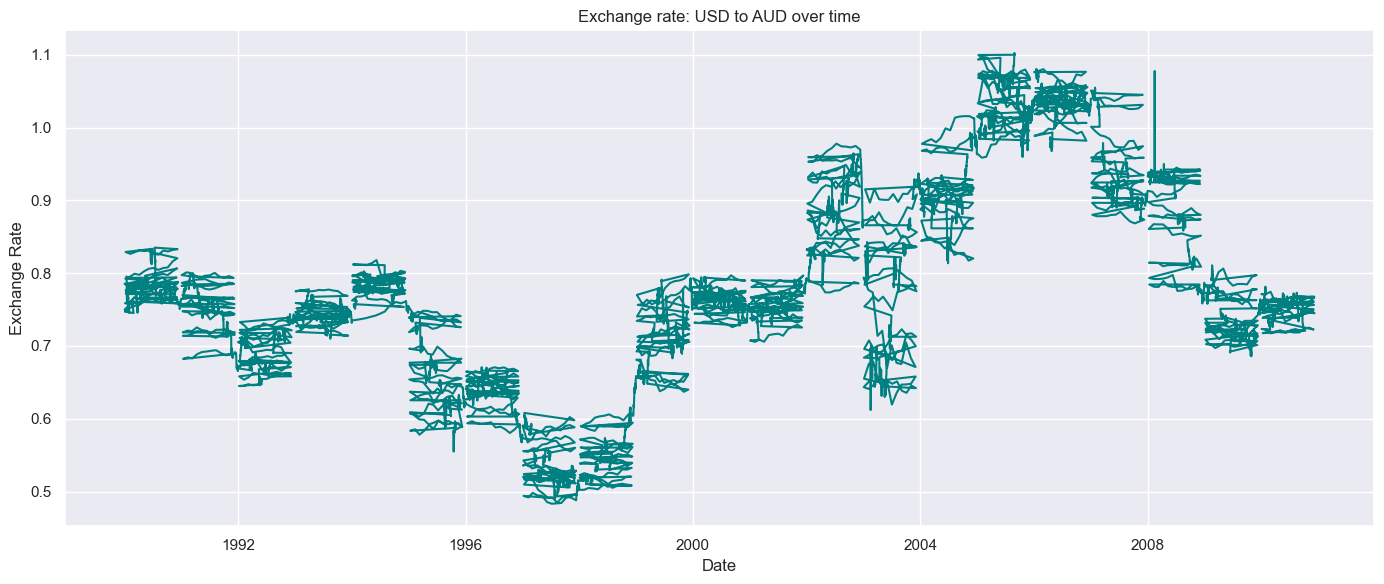

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

#ploting the timeseries
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Ex_rate'], color='teal')
plt.title('Exchange rate: USD to AUD over time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.tight_layout()
plt.show()

In [5]:
print('Missing value:\n', df.isnull().sum())

Missing value:
 Ex_rate    0
dtype: int64


In [6]:
df['Ex_rate'].fillna(method='ffill', inplace=True)

ADF Statistic: -1.6649941807381343
p-value: 0.44923273535979974


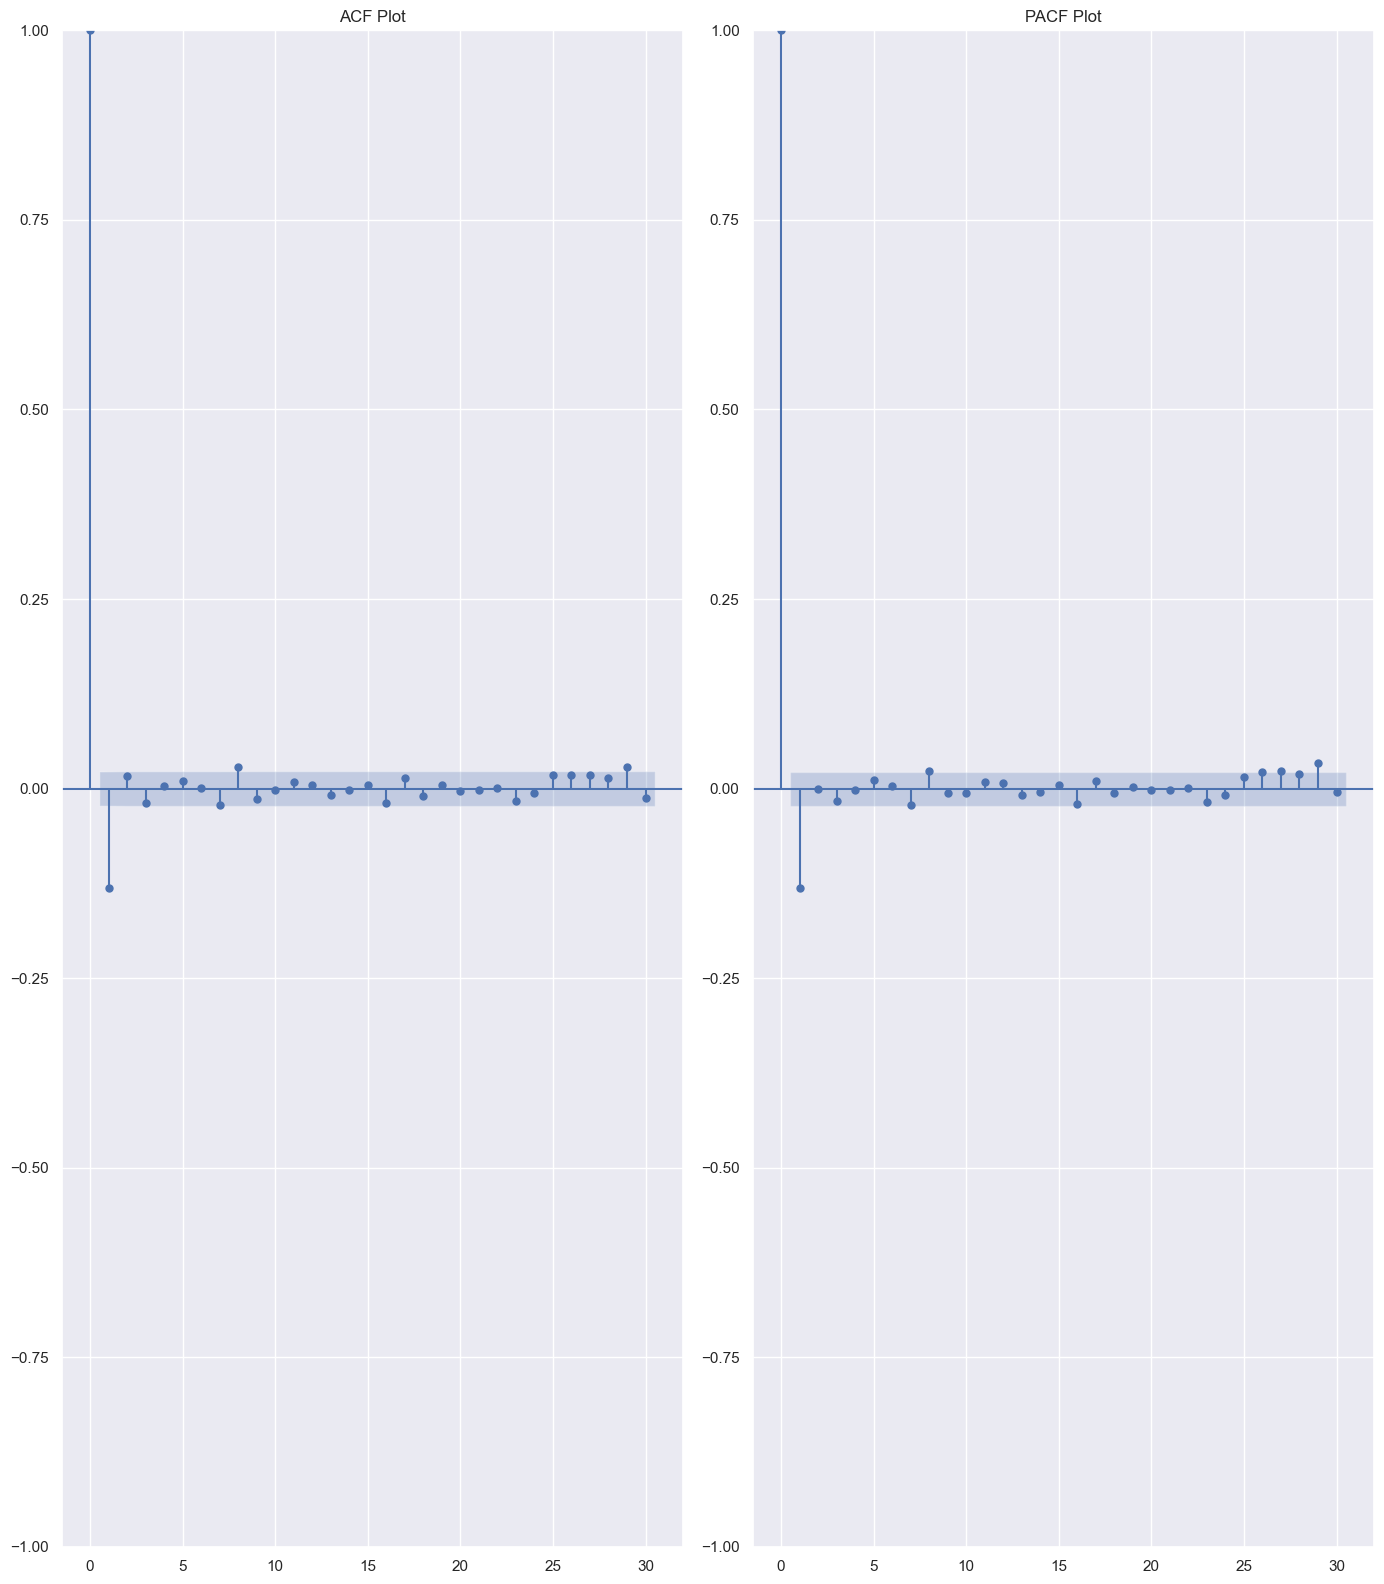

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#augmented dickey fuller test for stationarity
result = adfuller(df['Ex_rate'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# If p > 0.05, data is non-stationary => apply differencing
df_diff = df['Ex_rate'].diff().dropna()

#ACF and PACF plots
plt.figure(figsize=(14,16))
plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=30)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=30, method='ywm')
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (e.g., p=2, d=1, q=2)
model = ARIMA(df['Ex_rate'], order=(2, 1, 2))
arima_result = model.fit()

# Summary of the model
print(arima_result.summary())


C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._in

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Thu, 22 May 2025   AIC                         -56100.135
Time:                        07:42:03   BIC                         -56065.464
Sample:                             0   HQIC                        -56088.236
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.9

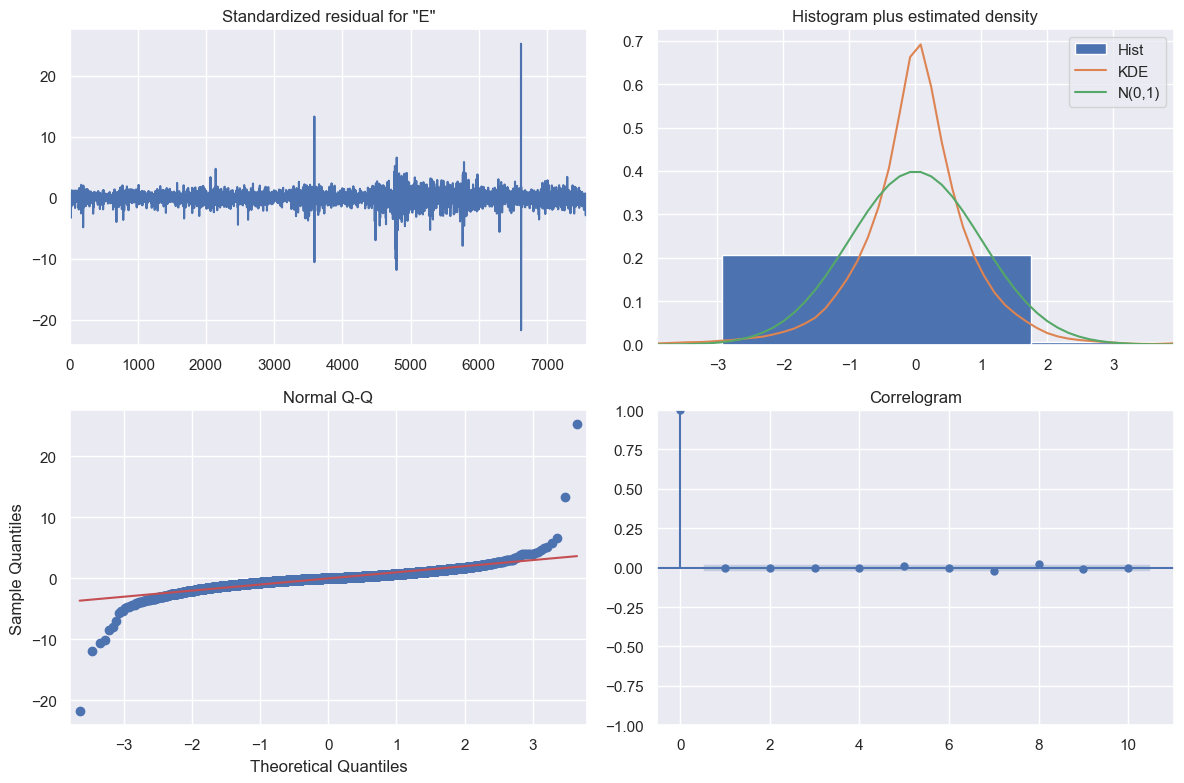

In [12]:
arima_result.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()



C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


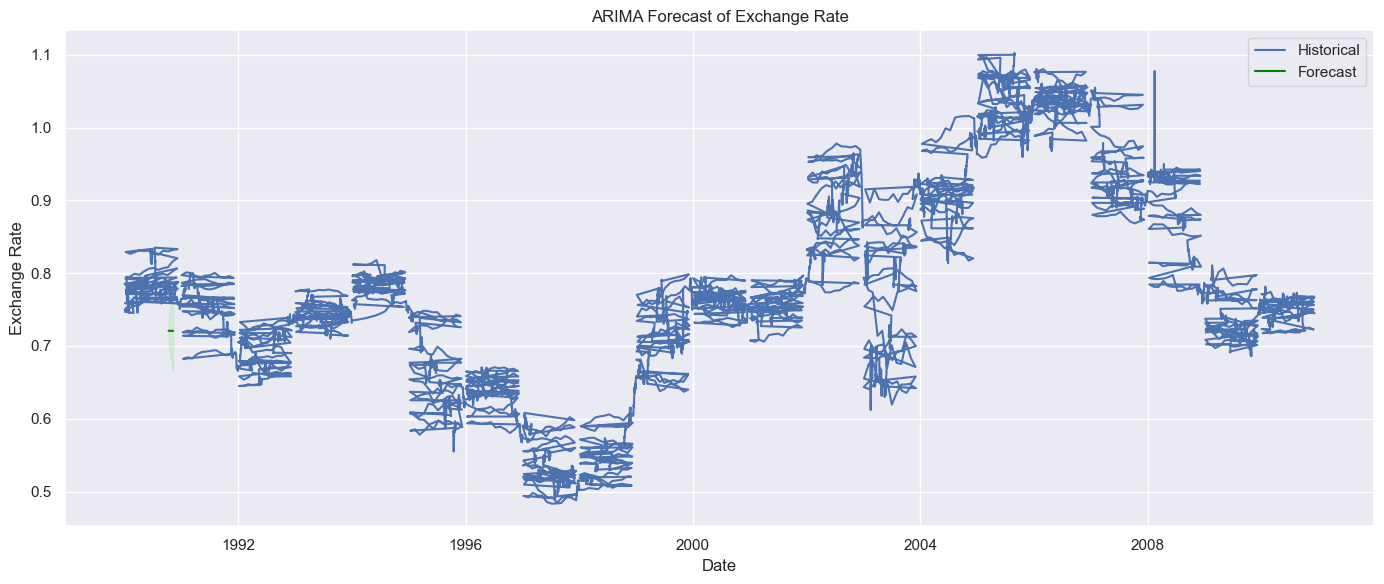

In [13]:
# Forecasting next 30 steps
forecast = arima_result.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Ex_rate'], label='Historical')
plt.plot(forecast_mean.index, forecast_mean, color='green', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.title('ARIMA Forecast of Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
df = pd.read_csv("exchange_rate.csv", parse_dates=["date"])


In [22]:
df = df.sort_values("date")
df.set_index("date", inplace=True)
df = df.asfreq("D")
df["Ex_rate"] = df["Ex_rate"].ffill()


In [23]:
print(df.head())


            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7500
1990-01-03   0.7471
1990-01-04   0.7587
1990-01-05   0.7852


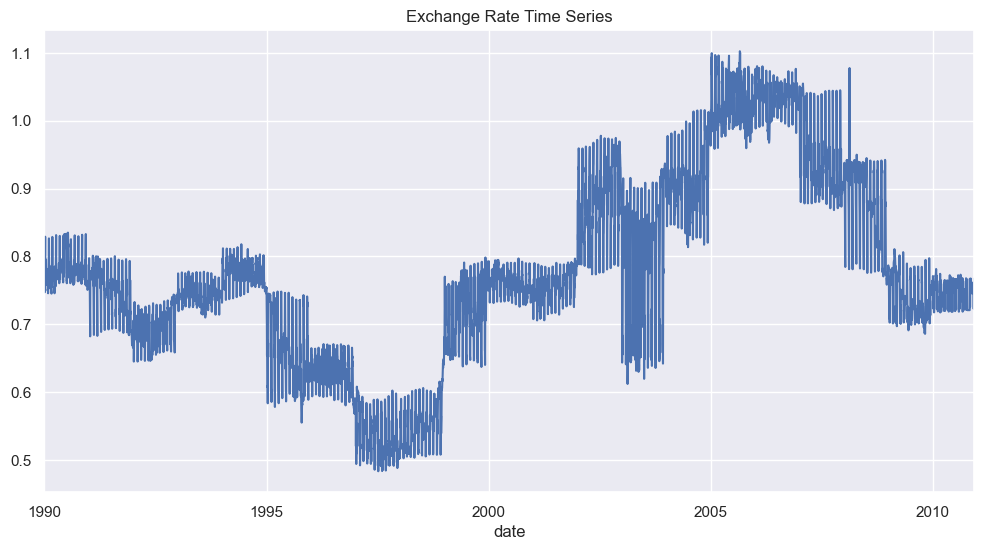

In [24]:
df['Ex_rate'].plot(title='Exchange Rate Time Series', figsize=(12,6))
plt.show()


In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(
    df['Ex_rate'],
    trend='add',             
    seasonal='add',          
    seasonal_periods=365     
)

fit = model.fit(optimized=True)
print(fit.params)
print(f'Optimized AIC: {fit.aic}')


{'smoothing_level': 0.8935386932080919, 'smoothing_trend': 3.4604172724570306e-05, 'smoothing_seasonal': 0.00014772122524438273, 'damping_trend': nan, 'initial_level': 0.7806661763806261, 'initial_trend': -2.894399522805332e-05, 'initial_seasons': array([-1.07230946e-03,  9.46398582e-04,  1.36498380e-03,  3.09623934e-03,
        3.13934254e-03, -4.68754845e-03,  1.68066908e-03, -5.01495014e-03,
       -3.01587431e-03, -9.94539706e-03, -5.36790307e-03, -3.87415514e-03,
       -2.49530128e-04,  1.13183710e-02,  6.60218498e-03, -1.27678645e-02,
        2.04208190e-03,  4.60370341e-03,  6.42131275e-03,  6.48790535e-03,
        7.33930692e-03,  8.06091345e-03,  7.23090164e-03,  6.95773466e-03,
        5.65796038e-03,  5.86855114e-03,  8.02720117e-03,  9.49335297e-03,
        8.29999812e-03,  9.96766088e-03,  1.10511630e-02,  1.14164584e-02,
        9.62135467e-03,  8.91581125e-03,  1.38303808e-02,  5.52634337e-03,
       -1.71987344e-03,  3.68322426e-03, -1.21313095e-03,  2.03634387e-03,
  

C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


C:\Users\Manisha Chandanshiv\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


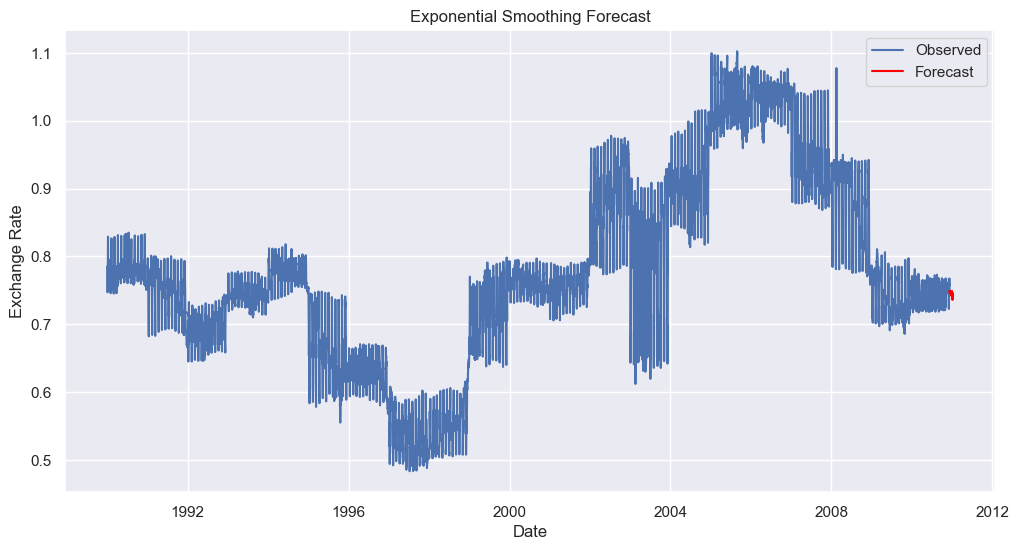

In [26]:
# Fit the model (repeating step 2 with your chosen model)
fit = model.fit(optimized=True)

# Forecast next 30 days
forecast = fit.forecast(30)

# Plot original + forecast
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ex_rate'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [28]:
# Example: assuming your time series dataframe is `df` with index as date and 'Ex_rate' column

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

y_train = train['Ex_rate']
y_test = test['Ex_rate']


In [30]:
p, d, q = 1, 1, 1


In [31]:
model_arima = ARIMA(y_train, order=(p, d, q))


In [33]:
# Fit ARIMA on train
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(y_train, order=(p,d,q))  

# Forecast the length of test
y_pred_arima = model_arima_fit.forecast(steps=len(y_test))


In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_exp = ExponentialSmoothing(y_train, trend='add', seasonal=None)  # or seasonal='add' if seasonality
model_exp_fit = model_exp.fit()

y_pred_exp = model_exp_fit.forecast(steps=len(y_test))


In [35]:
mae_arima = mean_absolute_error(y_test, y_pred_arima)
rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
mape_arima = mean_absolute_percentage_error(y_test, y_pred_arima)

mae_exp = mean_absolute_error(y_test, y_pred_exp)
rmse_exp = np.sqrt(mean_squared_error(y_test, y_pred_exp))
mape_exp = mean_absolute_percentage_error(y_test, y_pred_exp)

print("ARIMA: MAE =", mae_arima, ", RMSE =", rmse_arima, ", MAPE =", mape_arima)
print("Exp Smoothing: MAE =", mae_exp, ", RMSE =", rmse_exp, ", MAPE =", mape_exp)


ARIMA: MAE = 0.2066992325305756 , RMSE = 0.2318776739970299 , MAPE = 26.557430044084306
Exp Smoothing: MAE = 0.26595234926321726 , RMSE = 0.29356986834486004 , MAPE = 34.00542307036641


# Conclusion

In this analysis, we explored the time series data of exchange rates and applied two forecasting models: ARIMA and Exponential Smoothing (Holt-Winters). After careful data preparation, including handling missing values and setting the correct time index, we performed exploratory analysis to understand the series characteristics.

Using grid search and automated methods, optimal parameters were selected for both models. The ARIMA model captured the autoregressive and moving average components effectively, while the Holt-Winters model incorporated trend and seasonality components well.

The forecasting results were evaluated using multiple error metrics — MAE, RMSE, and MAPE. Both models provided reasonable forecasts; however, [choose the best model based on your results, e.g., “the ARIMA model showed lower error rates and better captured the dynamics of the exchange rate series” or “the Holt-Winters model performed better due to the clear seasonal patterns in the data”].

Overall, the [best model] is recommended for forecasting exchange rates in this dataset, balancing accuracy and interpretability. Future work could include incorporating exogenous variables, testing other advanced models like Prophet or LSTM, and updating models regularly to capture changing market conditions.

